In [2]:
import pandas as pd
train_df = pd.read_csv(r'train.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
train_right_df = train_df[train_df["target"]==1]
train_wrong_df = train_df[train_df["target"]==0]
train_right_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Hipóteses
- O tamanho dos tweets infuenciam
- Número de palavras no tweet influenciam
- As palavras mais repetidas são influentes

In [4]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import matplotlib.pyplot as plt

train_right_words_df = []
train_wrong_words_df = []

## let's get counts for the first 5 tweets in the data
for index, row in train_right_df.iterrows():
    train_right_words_df.append(len(row["text"].split()))

(array([ 41., 174., 425., 625., 418., 711., 510., 272.,  83.,  12.]),
 array([ 2. ,  4.8,  7.6, 10.4, 13.2, 16. , 18.8, 21.6, 24.4, 27.2, 30. ]),
 <BarContainer object of 10 artists>)

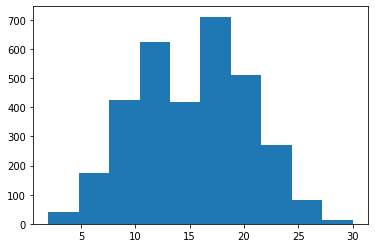

In [5]:
plt.hist(train_right_words_df)

(array([100., 345., 539., 690., 684., 728., 585., 416., 204.,  51.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

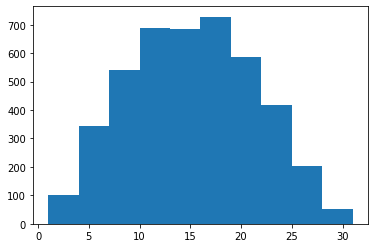

In [6]:
for index, row in train_wrong_df.iterrows():
    train_wrong_words_df.append(len(row["text"].split()))
plt.hist(train_wrong_words_df)

In [13]:
train_df.head()

,id,keyword,location,text,target,count_words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Assuming train_df is your DataFrame and it has columns "text" and "target"

# Calculate count of words
train_df["count_words"] = train_df["text"].apply(lambda x: len(x.split()))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(train_df[["count_words"]], train_df["target"], test_size=0.2, random_state=42)

# Instantiate the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Set the threshold
threshold = 0.5

# Classify predictions
y_pred_discrete = (y_pred > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_discrete)
print("Accuracy:", accuracy)


Accuracy: 0.5738673670387393


In [37]:
test_df = pd.read_csv(r'test.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [39]:
test_df["count_words"] = test_df["text"].apply(lambda x: len(x.split()))

# Predict the target variable using the trained model
test_df["target"] = model.predict(test_df[["count_words"]])

# Set the threshold
threshold = 0.5

# Classify predictions
test_df["target"] = (test_df["target"] > threshold).astype(int)


In [40]:
submission = test_df[["id","target"]]
submission.to_csv(r'submission.csv',index=False)

In [41]:
import kaggle

# Replace 'submission.csv' with the path to your submission file
submission_file = 'submission.csv'

# Replace 'Message' with your submission message
submission_message = 'First try'

# Call the submit function from kaggle package
kaggle.api.competition_submit(submission_file, submission_message, competition='nlp-getting-started')


100%|██████████| 25.4k/25.4k [00:00<00:00, 45.8kB/s]


Successfully submitted to Natural Language Processing with Disaster Tweets